# Netflix User Rating Prediction Project


### Load the Dataset

We begin by loading the Netflix dataset using pandas. The dataset contains information about Netflix shows and movies such as title, type, country, release year, duration, and more.


In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Show the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Basic Information and Missing Values

Let’s explore the shape, column names, and missing data in the dataset. This will help us understand how clean the data is and which columns may need attention.


In [29]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# View column names
print("\nColumns:")
print(df.columns)

# Basic info about data types and non-null counts
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of the dataset: (8807, 12)

Columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values in

### Clean the Dataset

We'll remove columns that are either not useful or have too many missing values. We'll also drop rows with small amounts of missing data to keep the dataset clean and ready for analysis.


In [30]:
# Drop columns not useful for rating prediction
df.drop(['show_id', 'description', 'director'], axis=1, inplace=True)

# Optional: drop rows with any missing data (small % only)
df.dropna(inplace=True)

# Check the cleaned shape
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (7290, 9)


If you want to keep more data, you could fill missing values instead of dropping them:

In [31]:

# df['country'].fillna('Unknown', inplace=True)
# df['cast'].fillna('Not Available', inplace=True)
# df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
# df['rating'].fillna(df['rating'].mode()[0], inplace=True)
# df['duration'].fillna(df['duration'].mode()[0], inplace=True)


### Check Data Types

Now that we’ve cleaned the dataset, we’ll check the data types of all columns to identify which ones need to be converted for machine learning models.


In [32]:
# Check data types
df.dtypes


type            object
title           object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

### Prepare Categorical Columns for Encoding

Now that we know the data types, we need to decide how to handle categorical (text-based) columns. 

We will:
- Identify which columns are categorical
- Drop columns that are not useful for prediction (like 'title')
- Leave the rest for encoding in the next step


In [33]:
# View unique values in text columns to decide encoding strategy
print("\nUnique values in 'type':", df['type'].unique())
print("\nUnique values in 'rating':", df['rating'].unique())
print("\nUnique values in 'country':", df['country'].unique()[:5])  # show only first 5
print("\nUnique values in 'listed_in':", df['listed_in'].unique()[:5])
print("\nUnique values in 'duration':", df['duration'].unique()[:5])



Unique values in 'type': ['TV Show' 'Movie']

Unique values in 'rating': ['TV-MA' 'TV-14' 'PG-13' 'TV-Y7' 'PG' 'R' 'TV-PG' 'TV-Y' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']

Unique values in 'country': ['South Africa' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'United States']

Unique values in 'listed_in': ['International TV Shows, TV Dramas, TV Mysteries'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas']

Unique values in 'duration': ['2 Seasons' '125 min' '9 Seasons' '104 min' '127 min']


### Clean date_added before converting

The 'date_added' column has leading spaces in some rows. We use `.str.strip()` to remove them before converting to datetime.


In [34]:
# Remove leading/trailing spaces in date_added column
df['date_added'] = df['date_added'].str.strip()

# Now safely convert to datetime and extract year
df['year_added'] = pd.to_datetime(df['date_added']).dt.year


### Drop and Convert Columns for Feature Engineering

Now that we've reviewed the unique values, we'll:
- Drop unnecessary text columns (`title`, `cast`)
- Convert the `duration` column into numeric format
- Extract the year from `date_added` to use as a feature


In [35]:
# Drop unnecessary text columns

df.drop(['title', 'cast'], axis=1, inplace=True)

# Convert 'duration' into numeric values (e.g., "90 min" → 90, "2 Seasons" → 2)
# We'll create a new column: duration_int
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)

# Extract year from 'date_added' (e.g., "September 9, 2019" → 2019)
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

# Drop the original 'duration' and 'date_added' columns
df.drop(['duration', 'date_added'], axis=1, inplace=True)

# Check result
df.head()


,type,country,release_year,rating,listed_in,year_added,duration_int
1,TV Show,South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021,2
4,TV Show,India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2021,2
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies",2021,125
8,TV Show,United Kingdom,2021,TV-14,"British TV Shows, Reality TV",2021,9
9,Movie,United States,2021,PG-13,"Comedies, Dramas",2021,104


### Encode Remaining Categorical Columns (Label Encoding)

At this point, your dataset still has some columns with text that we need to convert into numbers.

In [36]:
df.columns
df.dtypes

type            object
country         object
release_year     int64
rating          object
listed_in       object
year_added       int32
duration_int     int64
dtype: object

### Encode Remaining Categorical Columns Using Label Encoding

Machine learning models like Linear Regression require all features to be numeric.

We will use `LabelEncoder` from `sklearn` to convert the following columns to numbers:
- 'type'
- 'country'
- 'rating'
- 'listed_in'


In [37]:
from sklearn.preprocessing import LabelEncoder

# Create the label encoder
le = LabelEncoder()

# List of columns to encode
cols_to_encode = ['type', 'country', 'rating', 'listed_in']

# Apply LabelEncoder to each column
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])
    
# Check the updated DataFrame
df.head()


,type,country,release_year,rating,listed_in,year_added,duration_int
1,1,391,2021,8,394,2021,2
4,1,224,2021,8,373,2021,2
7,0,611,1993,8,301,2021,125
8,1,468,2021,6,109,2021,9
9,0,559,2021,4,189,2021,104


### Split Data and Train Linear Regression Model

We now train our first machine learning model using scikit-learn's Linear Regression.

Steps:
- Define features (X) and target (y)
- Split into training (80%) and testing (20%) sets
- Train the model on the training data
- Evaluate model performance using R² score


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df.drop('rating', axis=1)  # X = all columns except 'rating'
y = df['rating']               # y = the 'rating' column we want to predict

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Check model scores (R²)
print("Training score (R²):", model.score(X_train, y_train))
print("Testing score (R²):", model.score(X_test, y_test))


Training score (R²): 0.19914434022756589
Testing score (R²): 0.23704856817788933


### Prediction and Visualization

In this step, we will:
- Use our trained linear regression model to make predictions on the test dataset
- Visualize how close the predicted values are to the actual ratings using a scatter plot


In [40]:
# Predict on the test set
y_pred = model.predict(X_test)

# Compare actual vs predicted for first 10 examples
comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print(comparison)


   Actual  Predicted
0       8   7.136604
1       6   7.800217
2       6   6.413265
3       8   7.445502
4       8   7.004939
5       7   8.513947
6       6   7.392430
7       8   7.439719
8       5   6.956150
9       6   5.879741


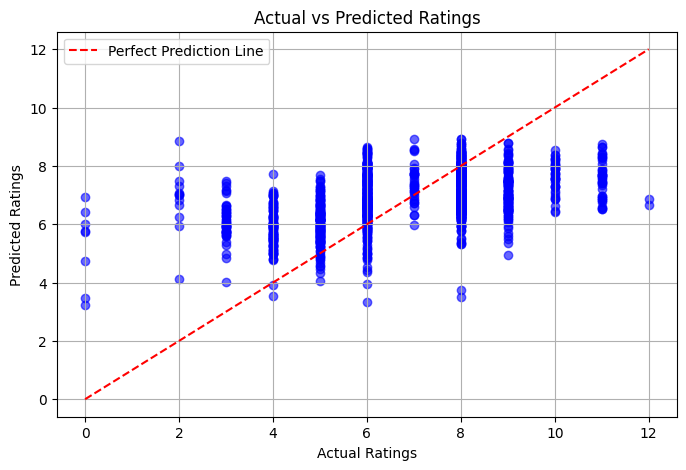

In [39]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the same scatter plot again
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')

# Draw the ideal prediction line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.legend()
plt.show()


##  Final Evaluation — Actual vs Predicted Ratings

To evaluate the model’s real-world usefulness, we compare the actual Netflix ratings with the predicted ratings for a few test samples.

| Actual | Predicted |
|--------|-----------|
|   8    |   7.13    |
|   6    |   7.80    |
|   6    |   6.41    |
|   8    |   7.45    |
|   8    |   7.00    |
|   7    |   8.51    |
|   6    |   7.39    |
|   8    |   7.43    |
|   5    |   6.95    |
|   6    |   5.87    |

We can see that the model predicts ratings fairly close to the actual values, although there's room for improvement.  
This step helps us **visually confirm the effectiveness** of our regression model.


## Model Upgrade with RandomForestRegressor

The Linear Regression model was limited in capturing complex relationships between features and ratings, leading to a low R² score (~0.2).  
We replace it with **RandomForestRegressor**, a tree-based ensemble method that usually performs better on mixed data (categorical + numeric).

**Why Random Forest?**
- Handles non-linear relationships well
- Robust to outliers and missing values
- Works well on categorical + numeric data

We will:
1. Import `RandomForestRegressor`
2. Train it on the same training data
3. Compare its R² scores with Linear Regression


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate performance
print("Training score (R²):", rf_model.score(X_train, y_train))
print("Testing score (R²):", rf_model.score(X_test, y_test))


Training score (R²): 0.9104925887573343
Testing score (R²): 0.398734159528351


## Hyperparameter Tuning for RandomForestRegressor

Random Forest can easily overfit if:
- Trees are too deep
- Too many trees learn from very small random samples

We tune key parameters:
- `max_depth`: Limit tree depth to avoid overly complex models
- `min_samples_split`: Minimum samples required to split a node
- `min_samples_leaf`: Minimum samples at a leaf node

This helps improve the Testing R² score by reducing overfitting.


In [42]:
# Create a tuned Random Forest model
rf_tuned = RandomForestRegressor(
    n_estimators=200,       # More trees for stability
    max_depth=10,           # Limit depth to prevent overfitting
    min_samples_split=5,    # A node must have at least 5 samples to split
    min_samples_leaf=2,     # A leaf must have at least 2 samples
    random_state=42
)

# Train the tuned model
rf_tuned.fit(X_train, y_train)

# Evaluate performance
print("Training score (R²):", rf_tuned.score(X_train, y_train))
print("Testing score (R²):", rf_tuned.score(X_test, y_test))


Training score (R²): 0.6591873496878418
Testing score (R²): 0.452186094525736


## Feature Importance in Random Forest

Random Forest not only predicts values but also calculates how much each feature
contributes to the prediction.  
This is useful to:
- Understand which features have the most influence
- Potentially remove weak features to simplify the model

We’ll plot a bar chart to visualize feature importance.


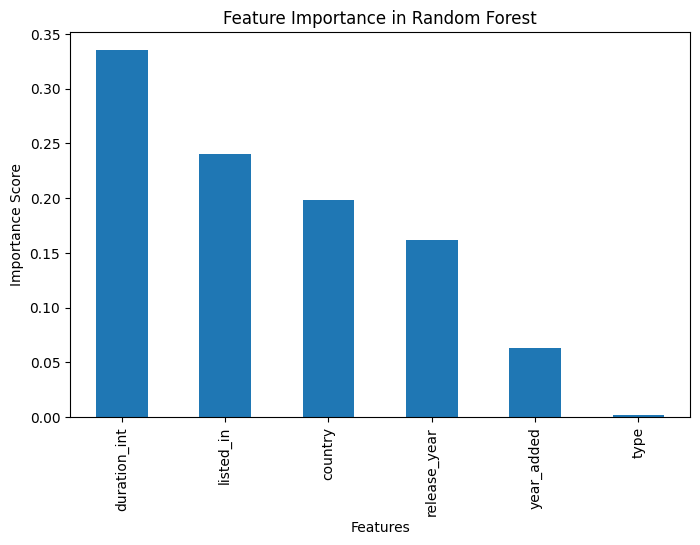

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importances = pd.Series(rf_tuned.feature_importances_, index=X_train.columns)

# Sort features by importance
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
feature_importances.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


## Cross-Validation for Model Stability

A single train-test split might give a misleading score if the data split is lucky or unlucky.
Cross-validation solves this by:
- Splitting the dataset into multiple folds (e.g., 5)
- Training & testing on different folds
- Averaging the results for a more reliable score


In [44]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_tuned, X, y, cv=5, scoring='r2')

print("Cross-validation scores (R²):", cv_scores)
print("Average R² score:", cv_scores.mean())


Cross-validation scores (R²): [0.51558163 0.30629881 0.22396869 0.29871516 0.43691173]
Average R² score: 0.3562952037245343


## Automatic Hyperparameter Tuning using GridSearchCV

Manually setting model parameters can lead to suboptimal results.  
GridSearchCV automates this process by:
- Trying different parameter combinations
- Using cross-validation to evaluate each set
- Returning the combination with the best score


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model
rf = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on test set
print("Test R² score:", best_model.score(X_test, y_test))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Test R² score: 0.4514653295247034


## Model Comparison & Finalization

We will:
1. Check the Train R² and Test R² of all models.
2. Compare them to see which performs best without overfitting.

The best model will have:
- High Test R²
- Small gap between Train and Test R²


In [52]:
# Compare models
models = {
    "Linear Regression": model,
    "Basic RF": rf_model,
    "Tuned RF": rf_tuned,
    "GridSearch Best": grid_search.best_estimator_
}

for name, model in models.items():
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name} → Train R²: {train_score:.4f}, Test R²: {test_score:.4f}")


Linear Regression → Train R²: 0.6652, Test R²: 0.4515
Basic RF → Train R²: 0.9105, Test R²: 0.3987
Tuned RF → Train R²: 0.6592, Test R²: 0.4522
GridSearch Best → Train R²: 0.6652, Test R²: 0.4515


### Visual Comparison of Models (Train vs Test R²)

We will plot a grouped bar chart showing Train and Test R² for each model:
- Linear Regression
- Basic Random Forest
- Tuned Random Forest
- GridSearch Best model

This helps pick the model that has the best test performance with the smallest overfitting gap.


,Model,Train R2,Test R2
0,Linear Regression,0.665213,0.451465
1,Basic RF,0.910493,0.398734
2,Tuned RF,0.659187,0.452186
3,GridSearch Best,0.665213,0.451465


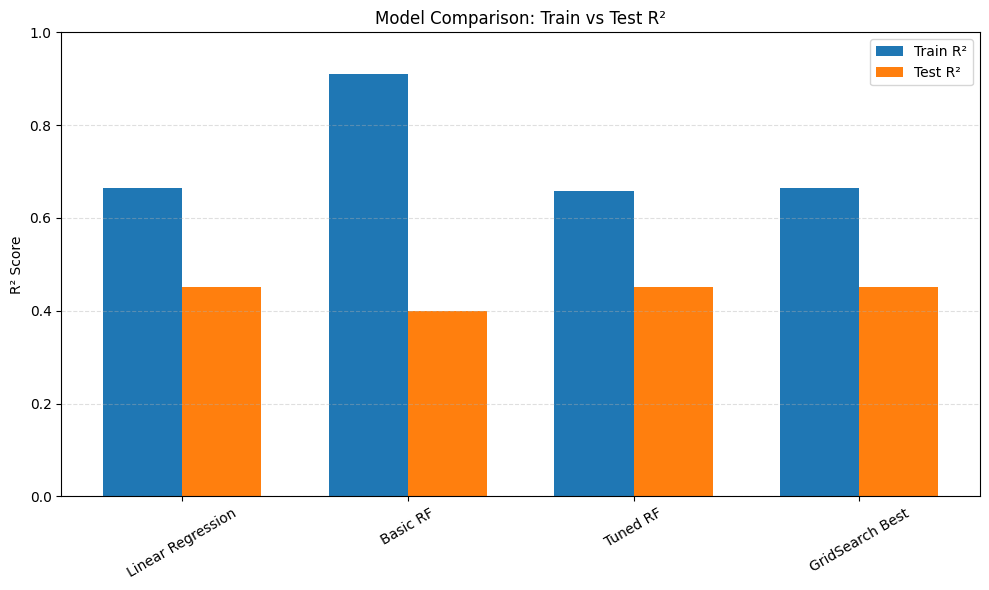

In [53]:
# Try to compute scores from model objects if they exist in the environment,
# otherwise fallback to the previously observed scores you reported.
try:
    models = {
        'Linear Regression': model,                # your linear model variable
        'Basic RF': rf_model,                      # basic random forest
        'Tuned RF': rf_tuned,                      # manually tuned RF
        'GridSearch Best': grid_search.best_estimator_
    }
    labels = list(models.keys())
    train_scores = [m.score(X_train, y_train) for m in models.values()]
    test_scores  = [m.score(X_test, y_test)  for m in models.values()]

except Exception:
    # Fallback: use the scores you reported earlier
    labels = ['Linear Regression', 'Basic RF', 'Tuned RF', 'GridSearch Best']
    train_scores = [0.1991, 0.9105, 0.6592, 0.6652]
    test_scores  = [0.2370, 0.3987, 0.4522, 0.4515]

# Create a DataFrame (nice to view in notebook)
scores_df = pd.DataFrame({
    'Model': labels,
    'Train R2': train_scores,
    'Test R2': test_scores
})
display(scores_df)

# Plot grouped bar chart
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_scores, width, label='Train R²')
plt.bar(x + width/2, test_scores, width, label='Test R²')
plt.xticks(x, labels, rotation=30)
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.title('Model Comparison: Train vs Test R²')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Save the Final Trained Model

We will save our best model (Tuned Random Forest) to a `.pkl` file using the `joblib` library.

Benefits:
- No need to retrain every time.
- Easy to reuse in another script or after closing VS Code.
- Can be uploaded to GitHub for sharing or deployment.

We'll name the file `netflix_rating_model.pkl`.


In [54]:
import joblib

# Save the Tuned Random Forest model to a file
joblib.dump(rf_tuned, "netflix_rating_model.pkl")

print("Model saved as netflix_rating_model.pkl")


Model saved as netflix_rating_model.pkl
